# Анализ оттока клиентов банка "Метанпром"

<b>Материалы</b>
1) <a href='https://disk.yandex.ru/i/0cPJfk7Hwp9sKg'> Презентация </a><br>
2) <a href='https://public.tableau.com/app/profile/anton8215/viz/Dashbord_metabank_SAN/Churn_bankSAN?publish=yes'>Дэшборд</a>

<b>Цель исследования: </b><br>
Провести анализ клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить из банка.

<b>Задача: </b><br>
- определить все значимые признаки отточности (интервалы значений характеристик, которые связаны с повышенным оттоком, сравнить портреты типичных клиентов);
- проверить стат. гипотезу и гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались (как пример);
- сформировать сегменты, использую признаки отточности;
- выбрать наилучшие сегменты и подготовить рекомендации по ним.

<b>Ход исследования: </b>
1) Обзор данных.<br>

2) Предобработка данных:<br>
- приведение наименований столбцов в "змеиный" формат;
- поиск явных и неявных дубликатов;
- преобразование типов данных;
- анализ пропусков данных, оценка классификаций пропусков (MCAR, MAR, MNAR);
- кодирование категориальных признаков по городу и полу.<br>

3) Исследовательский анализ данных:<br>
- подготовить и сравнить портреты типичных клиентов;
- провести анализ отточности клиентов банка, изучить распределения характеристик в разрезе оттока.<br>
- провести расчте корреляции по отточности клиентов.

4) Проверка статистических гипотез:<br>
- Между ушедшими клиентами и клиентами, которые остались, нет статистически значимого различия доходов (t-test, u-test).
- Между ушедшими клиентами и клиентами, которые остались, нет статистически значимого различия в оценке собственности клиента.<br>
- Между ушедшими клиентами и клиентами, которые остались, нет статистически значимого различия в количестве используемых продуктов банка.

5) Подготовка промежуточного итога о том, какие показатели стратегически влияют на отток клиентов.<br>

6) Сегментация на основе стратегических показателей. <br>

7) Подготовка рекомендаций и выводов для отдела маркетинга.

8) Общий вывод по проекту.

9) Подготовка презентации и дэшборда

<b>Описание данных:</b>

<b>userid</b> — идентификатор пользователя;<br>
<b>score</b> — баллы кредитного скоринга;<br>
<b>city</b> — город;<br>
<b>gender</b> — пол;<br>
<b>age</b> — возраст;<br>
<b>equity</b> — приблезительная оценка собственности клиента;<br>
<b>balance</b> — баланс на счете;<br>
<b>products</b> — количество продуктов, которым пользуется клиент;<br>
<b>credit_card</b> — есть ли кредитная карта;<br>
<b>last_activity</b> — был ли клиент активен последнее время;<br>
<b>est_salary</b> — оценочная заработная плата клиента;<br>
<b>churn</b> — уходит или нет.<br>

### 1. Обзор данных

In [1]:
#Подключим необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings

In [2]:
#Установим библиотеку phik
!pip install phik
import phik
from phik.report import plot_correlation_matrix
from phik import report
from phik import resources

In [3]:
#задаем исходные настройки
warnings.filterwarnings("ignore")

In [4]:
#Прочитаем данные
df = pd.read_csv('/datasets/bank_scrooge.csv')

In [5]:
#Базовая функция для ознакомления с данными: инфо о типах, пропусках, явных дубликатах
def show_data(df):
    display(df.head(15))
    print('-----')
    print('Информация о типах данных')
    df.info()
    print('-----')
    for col in df.columns:
        print('Название:', col, '\nПропусков:\t', df[col].isna().sum(), 'Процент пропусков:\t', round(df[col].isna().sum() *100 / len(df[col])))
    round(df[col].isna().sum() *100 / len(df[col]))
    print('-----')
    print('Явных дубликатов')
    print(df.duplicated().sum())

In [6]:
show_data(df)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


-----
Информация о типах данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
-----
Название: USERID 
Пропусков:	 0 Процент пропусков:	 0
Название: score 
Пропусков:	 0 Процент пропусков:	 0
Название: city 
Пропусков:	 0 Процент пропусков:	 0
Название: gende

<div style="text-align: justify ">
<b>Вывод: </b> в ходе ознакомления с массивом данных стало известно что в исследовании будет участвовать 10 000 клиентов банка. Явных дубликатов не обнаружено. Имеется большое количество пропусков по столбцам <i>Age</i> (пропусков по данному столбцу менее 1%, такие значения будут удалены) и <i>Balance</i> - по данному столбцу пропусков более 23%, что с ними делать будем разбираться на этапе предобработке данных. Также стоит уделить внимание типам данных, на первый взгляд у некоторых столбцов тип данных придется менять, например по столбцу <i>Age</i>. Для "красоты" переведем наименование столбцов в "змеиный формат". Для исследовательского анализа добавим столбцы по городам с бинарным значением. 

### 2. Предобработка данных

<u><b>Привидение наименования столбцов в "змеиный" формат

In [7]:
# Наведение "красоты" путем переименования столбцов
df.rename(columns={'USERID':'user_id', 'EST_SALARY':'est_salary'}, inplace=True)
df.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

<u><b>Поиск неявных дубликатов

In [8]:
print('Города:', df['city'].unique())

Города: ['Рыбинск' 'Ярославль' 'Ростов']


In [9]:
print('Пол:',df['gender'].unique())

Пол: ['Ж' 'М']


In [10]:
df['credit_card'].unique()

array([0, 1])

In [11]:
df['churn'].unique()

array([1, 0])

In [12]:
print('Количество уникальных пользователей:', df['user_id'].nunique())
print('Количество дубликатов среди пользователей:', df['user_id'].duplicated().sum())

Количество уникальных пользователей: 9927
Количество дубликатов среди пользователей: 73


In [13]:
#поиск дубликатов по столбцу user_id
df[df['user_id'].duplicated(keep=False)].sort_values(by='user_id', ascending=True).head(20)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
1411,123461,829.0,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
8164,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0


<div style="text-align: justify ">
<b>Краткий вывод: </b> При просмотре данных неявных дубликатов по столбцам город, пол, наличие кредитной карты и информации об отточности каких-либо неявных дубликатов и лишних значений не обнаружено. По столбцу информации о клиентах было найдено 73 повторяющихся значения, однако по остальным параметрам дубликатов у таких данных не обнаружено. Возможно произошел технический сбой при сборе данных или заполнении информации. Такие повторы удалять из анализа не будем, хотя их доля менее 1,5%.

<u><b>Анализ пропусков данных, оценка классификаций пропусков (MCAR, MAR, MNAR)

In [14]:
pd.DataFrame(round(df.isna().sum(),)).style.background_gradient('coolwarm')

,0
user_id,0
score,0
city,0
gender,0
age,26
equity,0
balance,2295
products,0
credit_card,0
last_activity,0


Пропуск по столбцу с информацией о возрасте явно менее 1%, можем его отбросить без серьезных последствий для анализа. С пропусками в балансе нужно провезти дополнительный анализ, т.к. таких пропусков почти 23%.

In [15]:
#удаление пропусков по столбцу age
df = df.dropna(subset=['age'])
df['age'] = df['age'].astype(int)

In [16]:
df.isna().sum()

user_id             0
score               0
city                0
gender              0
age                 0
equity              0
balance          2279
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [17]:
#Анализ пропусков столбца balance
for col in ['city', 'gender', 'credit_card', 'last_activity', 'churn']:
    print(col)
    print('Количество клиентов')
    print(df[col].value_counts())
    print('')
    print('Количество пропусков')
    print(df[df['balance'].isna()][col].value_counts())
    print('')
    print('Процент распределения пропусков')
    print(round(df[df['balance'].isna()][col].value_counts(normalize=True)*100,2))
    print('________________________')

city
Количество клиентов
Ярославль    5875
Рыбинск      2683
Ростов       1416
Name: city, dtype: int64

Количество пропусков
Ярославль    1458
Рыбинск       586
Ростов        235
Name: city, dtype: int64

Процент распределения пропусков
Ярославль    63.98
Рыбинск      25.71
Ростов       10.31
Name: city, dtype: float64
________________________
gender
Количество клиентов
М    4991
Ж    4983
Name: gender, dtype: int64

Количество пропусков
М    1272
Ж    1007
Name: gender, dtype: int64

Процент распределения пропусков
М    55.81
Ж    44.19
Name: gender, dtype: float64
________________________
credit_card
Количество клиентов
1    6784
0    3190
Name: credit_card, dtype: int64

Количество пропусков
1    1858
0     421
Name: credit_card, dtype: int64

Процент распределения пропусков
1    81.53
0    18.47
Name: credit_card, dtype: float64
________________________
last_activity
Количество клиентов
1    5215
0    4759
Name: last_activity, dtype: int64

Количество пропусков
1    1251
0    1028

In [18]:
display(round(df.groupby(df['balance'].isnull()).mean(),2))

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
balance,,,,,,,,,,
False,171710.89,843.74,42.92,3.39,827245.59,2.08,0.64,0.52,124520.39,0.23
True,171904.89,865.36,42.09,0.05,NaN,1.16,0.82,0.55,226345.42,0.01


<div style="text-align: justify ">
Установить какую-либо зависимость пропусков трудно. Количество пропусков среди мужчин и женщин примерно одинаковое, по городам пропуски распределены пропорционально количеству клиентов в городе. Параметр активности клиента также имеет примерно одинаковое число пропусков. Пропуски по балансу при наличии кредитной карты возможно объяснить отсутствием средств на счетах, но этот момент спорный, т.к. кредитные средств тоже должны отображаться на счете. Зависимость пропусков от статуса клиента не подтвердилась, т.к. таких пропусков всего 13. Также важно отметить, что при дополнительном анализе зависимости пропусков от данных (среднее), пропуски практически не влияют на дальнейший анализ. Таким образом, установить взаимосвязь пропусков от имеющихся данных в болщинстве случаев не представляется возможным, но можно заметить, что большая разница имеется при оценке собственности клиента и оценочной зарплаты. Пропуски отбрасывать не стоит, также как и заполнять какими-либо значения, т.к. это приведёт к заметным искажениям. Можно предположить, что такие данные отсутствуют не случайной (MNAR).

<u><b>Кодирование категориальных признаков по городу и полу

Для того, чтобы применять среднее и смотреть корреляции какого-то числового показателя с категориальным неупорядоченным необходимо закодировать данные бинарными значениями. Для этого воспользуемся методом `get_dummies`.

In [19]:
#Создадим копии столбцов с городами и полом, чтобы не потерять данные
df['gender_bin'] = df['gender']
df['city_bin'] = df['city']

df.head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_bin,city_bin
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,Ж,Рыбинск
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,Ж,Рыбинск
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,Ж,Рыбинск
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,Ж,Ярославль
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,М,Ярославль
5,202305,856.0,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0,М,Рыбинск
6,177259,807.0,Ярославль,Ж,39,3,405042.44,3,0,1,103838.32,0,Ж,Ярославль
7,218868,825.0,Ярославль,Ж,38,4,458145.40,2,1,1,68085.48,0,Ж,Ярославль
8,211686,923.0,Ярославль,М,54,5,1206337.87,2,1,0,155371.79,0,М,Ярославль
9,133130,906.0,Ярославль,Ж,67,0,NaN,1,0,1,238055.53,0,Ж,Ярославль


In [20]:
#закодируем данные по столбцам с информацией о городе и поле
df = pd.get_dummies(df, columns=['gender_bin','city_bin'])
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_bin_Ж,gender_bin_М,city_bin_Ростов,city_bin_Рыбинск,city_bin_Ярославль
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,1,0,0,1,0
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,1,0,0,1,0
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,1,0,0,1,0
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,1,0,0,0,1
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,1,0,0,1


In [21]:
df.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn',
       'gender_bin_Ж', 'gender_bin_М', 'city_bin_Ростов', 'city_bin_Рыбинск',
       'city_bin_Ярославль'],
      dtype='object')

In [22]:
#переименуем столбцы
df = df.rename(columns = 
              ({'gender_bin_Ж':'woman','gender_bin_М':'man','city_bin_Ростов':'rostov','city_bin_Рыбинск':'rybinsk', 
                'city_bin_Ярославль':'yaroslavl'}))
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,woman,man,rostov,rybinsk,yaroslavl
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,1,0,0,1,0
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,1,0,0,1,0
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,1,0,0,1,0
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,1,0,0,0,1
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,1,0,0,1


<u><b>Устранение аномалий

Посмотрим, имебтся ли аномалии по информации о количестве продуктов у клиентов.

In [23]:
df.products.min()

0

Видно, что минимальное количество продуктов равно 0, чего быть не может, т.к. в таком случае клиент уже не является клиентом банка.

Отбросим таких клиентов.

In [24]:
df = df[df['products'] != 0]


<b>Вывод: </b> на этапе предобработки данных было сделано:
- дополнительный анализ на наличие неявных дубликатов и дубликатов по столбцу `user_id` - неявных дубликатов обнаружено не было, по столбцу информации о клиентах было найдено 73 дубликата, однако по остальным параметрам повторов у таких данных не обнаружено, для полноты анализа удалять таких пользователей не будем, хотя их доля менее 1,5%;
- анализ пропусков данных и оценка классификации таких пропусков - были удалены данные с пропусками по столбцу `age`, т.к. таких пропусков менее 1%, проведен детальный анализ для установки взаимосвязи пропусков столбцу `balance`. Установить какую-либо взаимосвязь не удалось, количество пропусков среди мужчин и женщин примерно одинаково, по городам пропуски распределены пропорционально численности населения города. Зависимость пропусков от статуса клиента не подтвердилась, таких пропусков всего 13. Таким образом, заполнить каким-либо значением пропуски не имеет смысла, т.к. это приведет к искажению анализа. Удалять такие пропуски также нельзя, т.к. таких значений почти 23%. Было принято решений оставить пропущенные значения.
- для дальнейшего анализа (применения среднего и просмотра корреляции) было проведено кодирование данных в бинарные значения (метод `get_dummies`);
- формат столбца `age` был переведен в целочисленный;
- наименование столбцов было переведено в привычный формат;
- по столбцу с количеством продуктов была удалена аномалия - количество продуктов равное 0 - такого быть не может, т.к. в таком случае человек не является клиентом банка.

### 3. Исследовательский анализ данных

<u><b>Анализ типичных клиентов банка

        city  count
0     Ростов   1416
1    Рыбинск   2682
2  Ярославль   5875


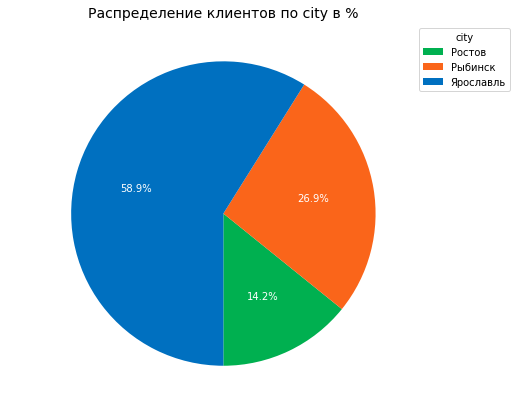

  gender  count
0      Ж   4982
1      М   4991


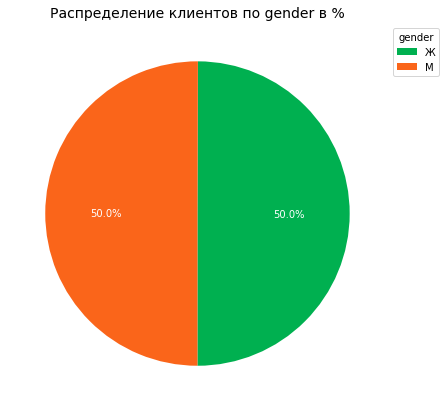

   credit_card  count
0            0   3189
1            1   6784


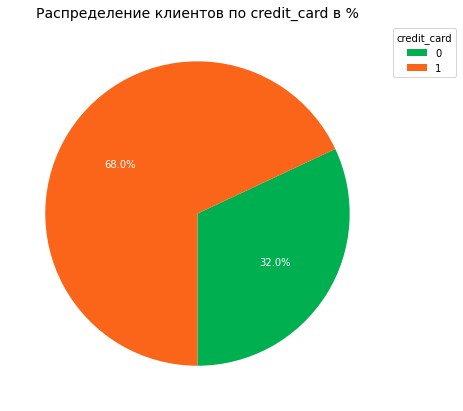

   last_activity  count
0              0   4758
1              1   5215


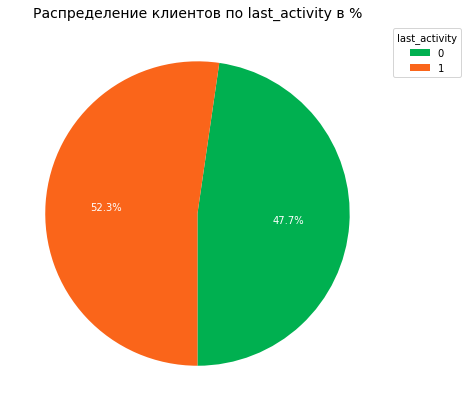

   churn  count
0      0   8155
1      1   1818


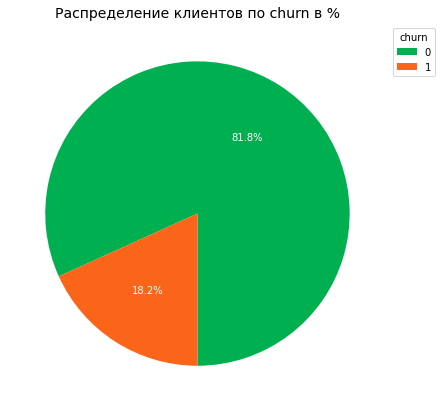

In [25]:
#Построение круговой диаграммы распределения клиентов по городам, полу, наличию кред. карты, активности и отточности
for col in ['city','gender','credit_card','last_activity','churn']:
    user = df.groupby(col).agg({'user_id': 'count'}).reset_index()
    user = user.rename(columns={'user_id':'count'})
    print(user)
    fig1,ax1 = plt.subplots(figsize =(15,7))
    ax1.pie(user['count'], labels=user[col], autopct='%.1f%%', startangle = 270, colors = ['#00B050','#FA651A','#0070C0'], textprops=dict(color="w"))
    ax1.legend(
          title=col,
          bbox_to_anchor=(1, 0, 0, 1))
    ax1.set_title(f'Распределение клиентов по {col} в %', fontsize = 14)
    plt.show()

Как видно из круговых диаграмм, больше всего клиентов в Ярославле - почти 60%, в Рыбинске  почти 27% и в Ростове Великом - 14%.
Среди клиентов количество женщин и мужчин примерно одинаковое. Клиентов с кредитными каратми больше почти в 2 раза. По активности почти равенство. Желающих покинуть банк сильно меньше, что хорошо.

count    9973.000000
mean       42.730773
std        12.175166
min        18.000000
25%        33.000000
50%        40.000000
75%        51.000000
max        86.000000
Name: age, dtype: float64


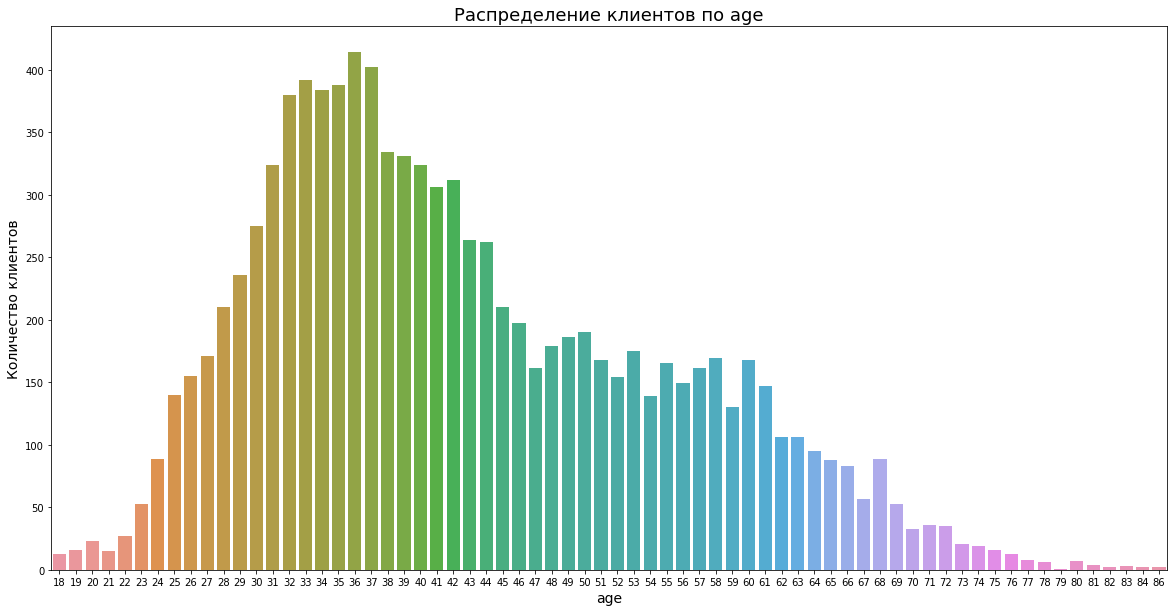

count    9973.000000
mean        2.630803
std         1.980060
min         0.000000
25%         0.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: equity, dtype: float64


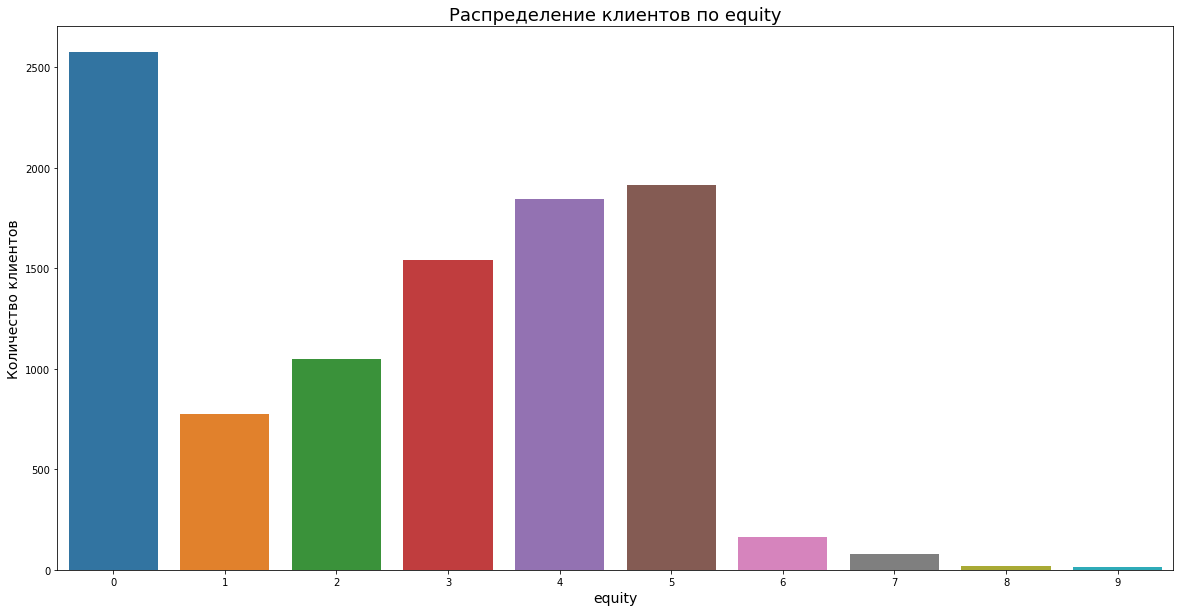

count    9973.000000
mean        1.871653
std         0.792547
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: products, dtype: float64


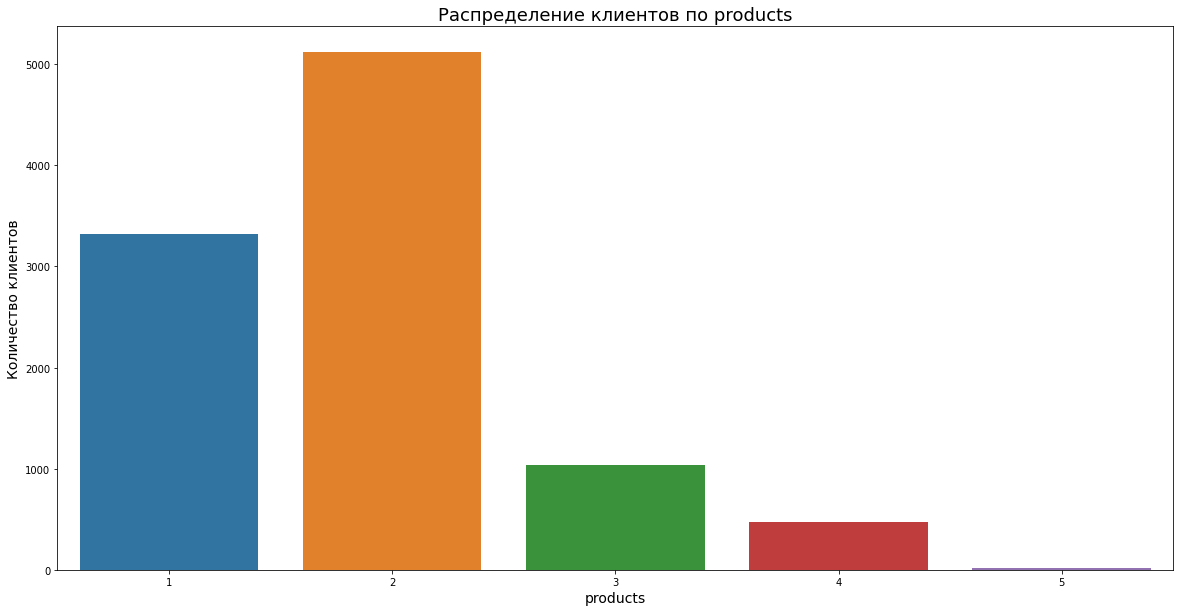

In [26]:
#анализ распределения клиентов по возрасту,оценки собственности капитала и количеству продуктов банка
for col in ['age','equity', 'products']:
    print(df[col].describe())
    plt.figure(figsize=(20,10))
    sns.countplot(data=df, x=col)
    plt.title(f'Распределение клиентов по {col}',fontsize = 18)
    plt.ylabel('Количество клиентов', fontsize = 14)
    plt.xlabel(col, fontsize = 14)
    plt.show()

Как видно из графиков основной поток клиентов в возрасте от 24 до 64 лет. Средний возраст 43 года. Большинство клиентов не имеют какой-либо собственности (более 2500), около 2000 клиентов имеют в собственности 4-5 объекта. Больше всего клиентов пользуются двумя продуктами.

count    9973.000000
mean      848.671212
std        65.393153
min       642.000000
25%       802.000000
50%       853.000000
75%       900.000000
max      1000.000000
Name: score, dtype: float64


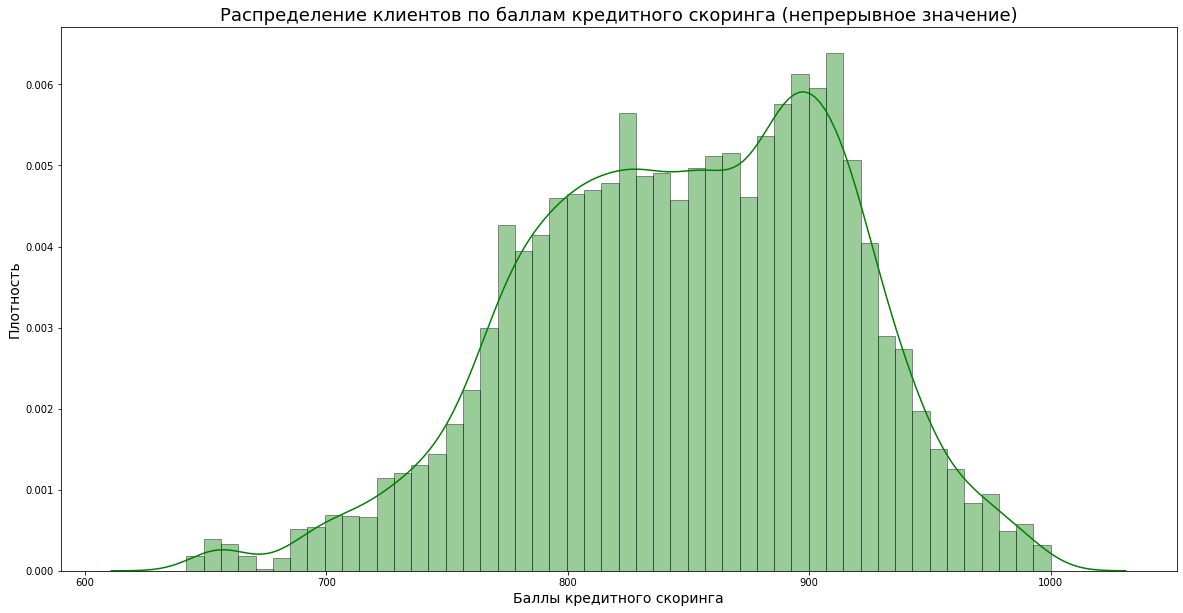

In [27]:
#Анализ клиентов по баллам кредитного скоринга
print(df['score'].describe())
plt.figure(figsize=(20,10))    
sns.distplot(df['score'], hist=True,  bins=50, color = 'green', hist_kws={'edgecolor':'black'})
plt.title('Распределение клиентов по баллам кредитного скоринга (непрерывное значение)',fontsize = 18)
plt.xlabel('Баллы кредитного скоринга',fontsize = 14)
plt.ylabel('Плотность',fontsize = 14)
plt.show()

Большинство клиентов имеют рейтинг от 780 до 920 баллов кредитного рейтинга, средний балл - 850

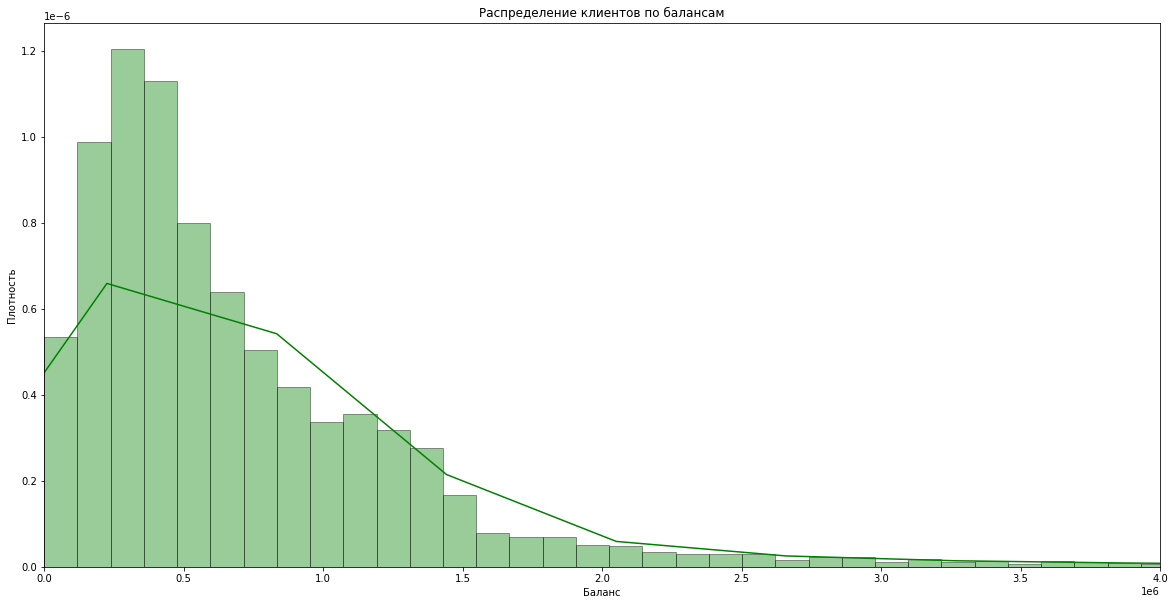

In [28]:
#анализ плотности распределения клиентов по балансам
plt.figure(figsize=(20,10))    
sns.distplot(df['balance'], hist=True,  bins=1000, color = 'green', hist_kws={'edgecolor':'black'})
plt.title('Распределение клиентов по балансам')
plt.xlabel('Баланс')
plt.ylabel('Плотность')
plt.xlim([0,4000000])
plt.show()

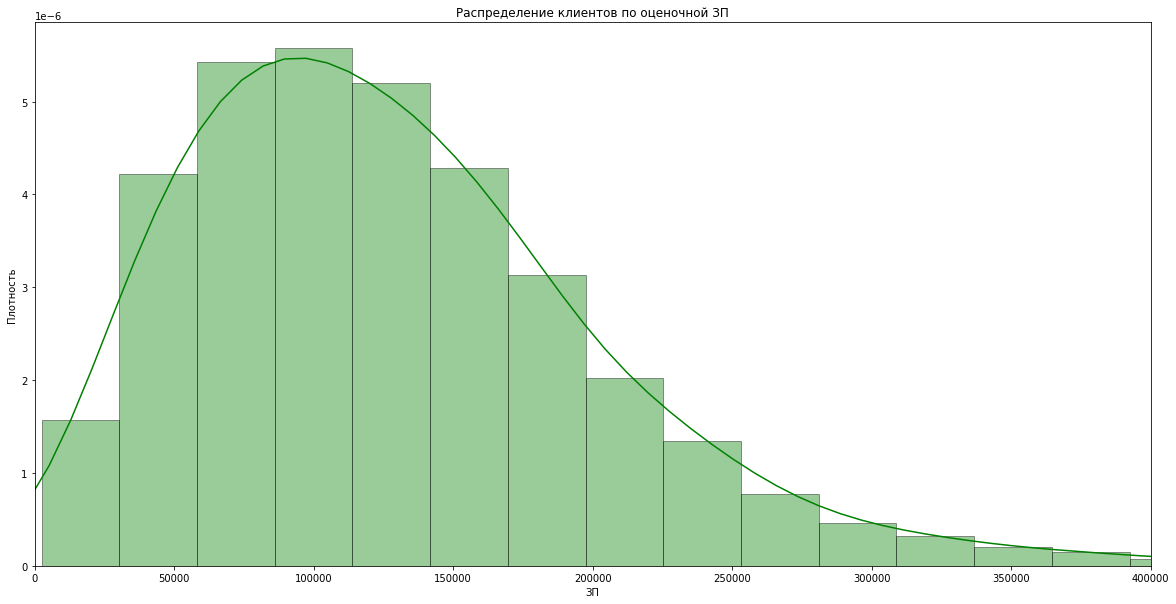

In [29]:
#анализ плотности распределения клиентов по оценочной ЗП
plt.figure(figsize=(20,10))    
sns.distplot(df['est_salary'], hist=True,  bins=50, color = 'green', hist_kws={'edgecolor':'black'})
plt.title('Распределение клиентов по оценочной ЗП')
plt.xlabel('ЗП')
plt.ylabel('Плотность')
plt.xlim([0,400000])
plt.show()

<u><b>Анализ отточности клиентов банка

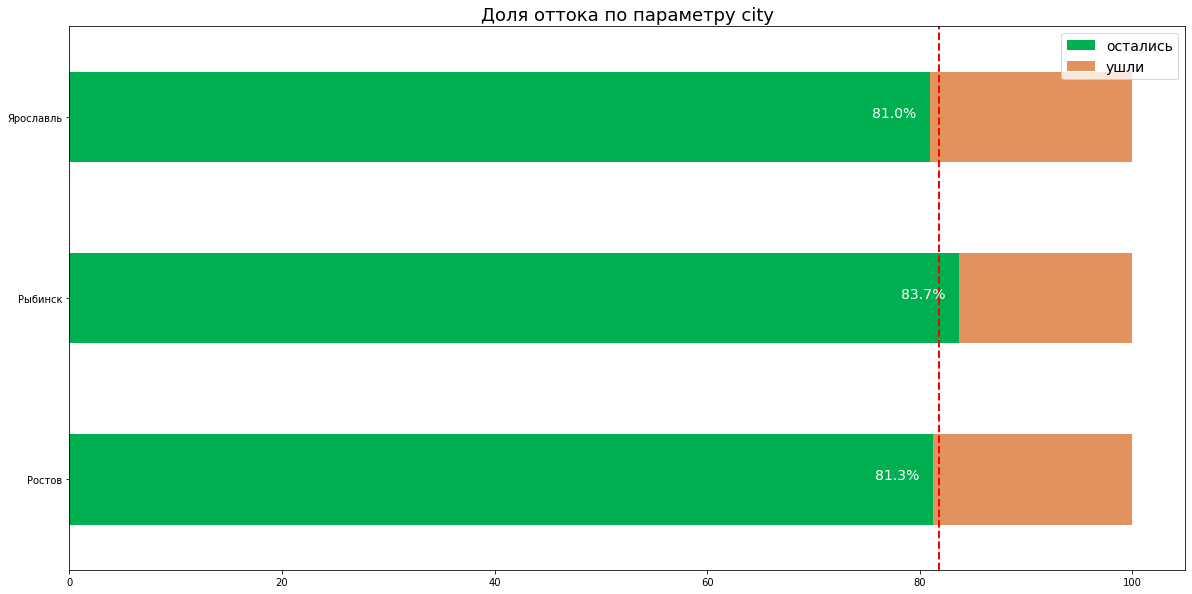

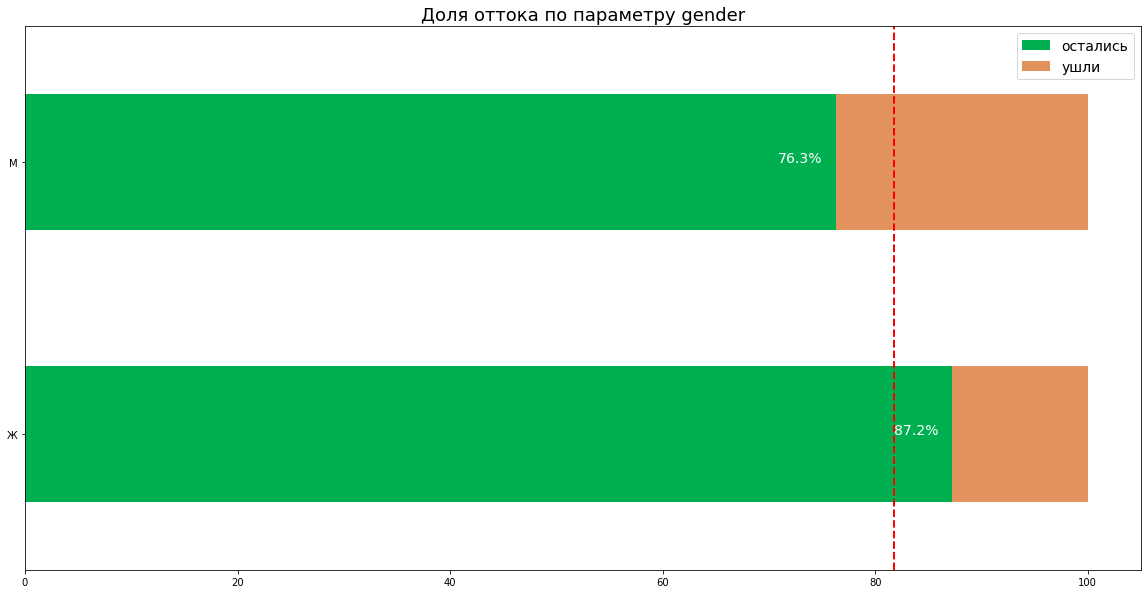

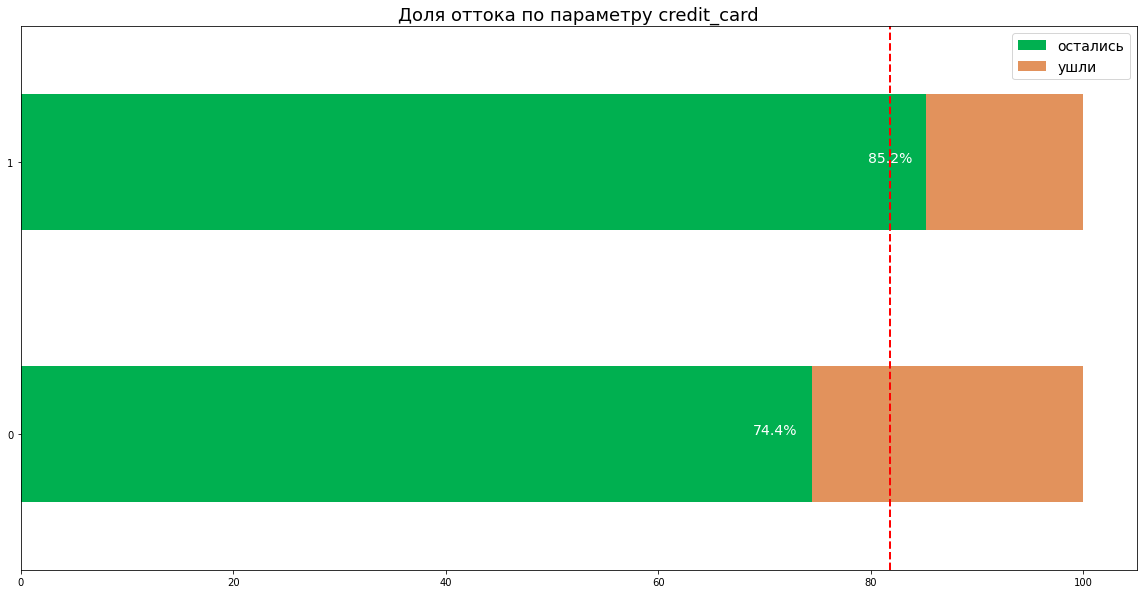

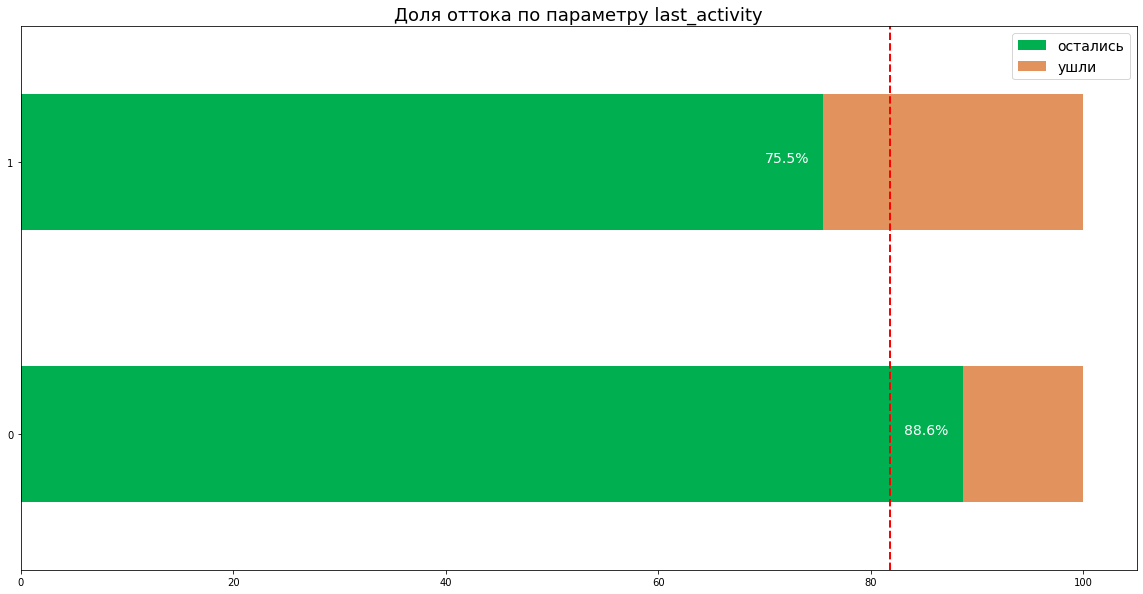

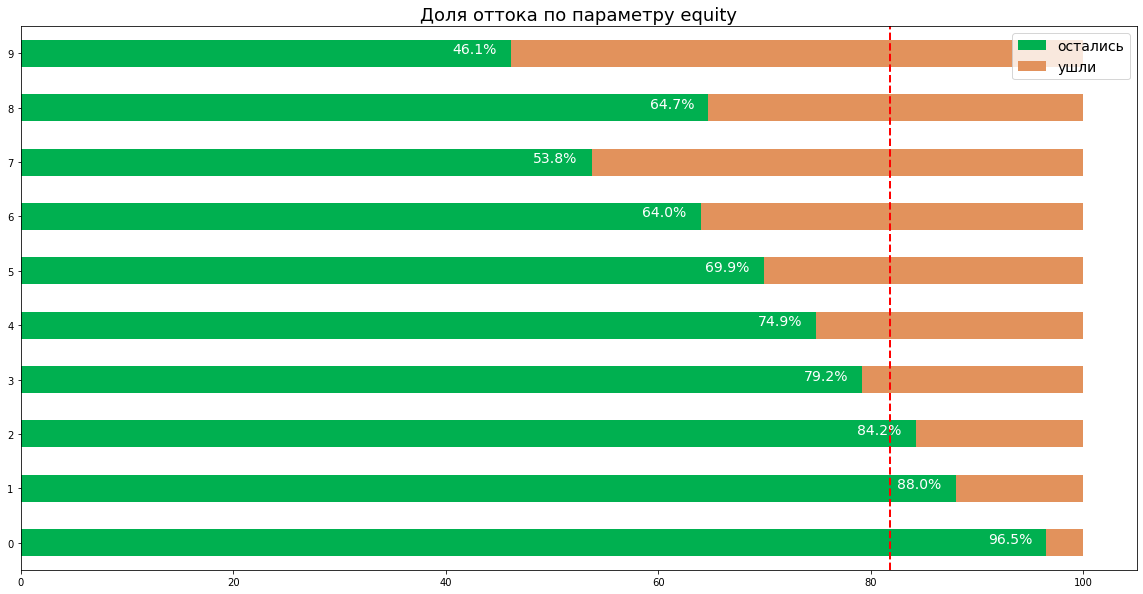

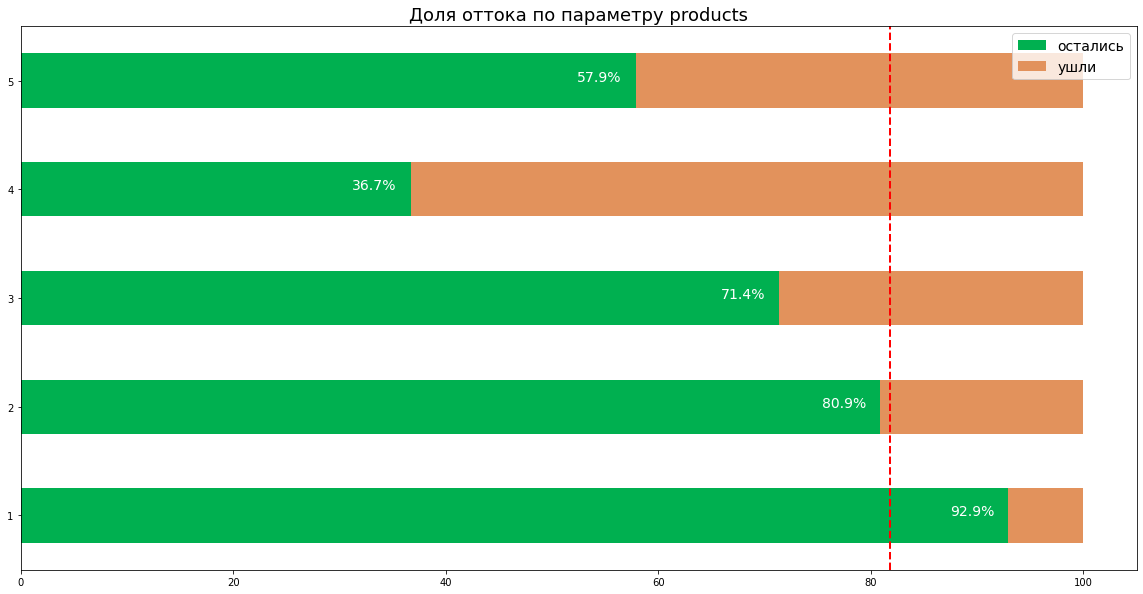

In [30]:
#построение графиков для анализа отточности клиентов
for col in ['city','gender','credit_card','last_activity','equity', 'products']:
        
#построим сводную таблицу с информацикй о доле отточных
        perc = df.pivot_table(index=col, columns='churn', values='user_id', aggfunc='count')
        perc['остались'] = round((perc[0] / (perc[0] + perc[1]))*100, 2)
        perc['ушли'] = 100 - perc['остались']
        perc = perc[['остались', 'ушли']]
        fig = plt.figure(figsize=(20, 10))
        ax2 = fig.add_subplot()
        perc.plot(kind = 'barh', color=['#00B050', '#E2925C'], stacked = True, ax = ax2, orientation=u'horizontal', ylabel='')
        
#нанесение надписей на график
        for z in range(perc.shape[0]):
            ax2.text(round(perc.iloc[z, 0], 2)-5.5, z,'{:.1%}'.format(perc.iloc[z, 0]/100), 
                     color='white', fontsize=14)    
            
        plt.title(f'Доля оттока по параметру {col}', fontsize = 18)
        plt.legend(['остались', 'ушли'], fontsize = 14)
        plt.ylabel('')
        plt.xlabel('',)
        plt.axvline(x=81.8, color='r', ls='--', lw=2)
        plt.show()   

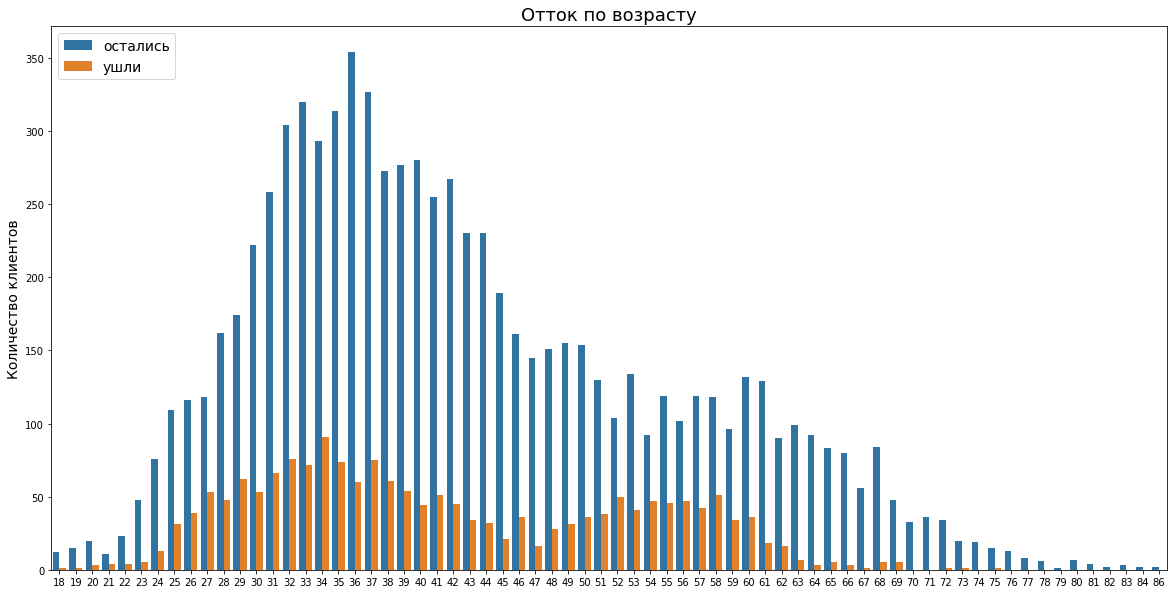

In [31]:
#построение графиков для анализа отточности клиентов по возрасту
plt.figure(figsize=(20,10)) 
ax = sns.countplot(data=df, x='age', hue='churn');
plt.title(f'Отток по возрасту', fontsize = 18)
plt.legend(['остались', 'ушли'], fontsize = 14)
plt.ylabel('Количество клиентов', fontsize = 14)
plt.xlabel('')
plt.show()  

<div style="text-align: justify ">
Из графиков видно, что больше всего отточность в Ярославле. Мужчины отказываются от услуг банка чаще женщин. Наличие кредитной карты на отточность не сильно влияет. А вот активность клиента наоборот - чем ниже активность, тем больше вероятность ухода клиента из банка. Также, большой процент клиентов уходит с двумя продуктами банка. Важно отметить, что ушедших с 4 продуктами даже больше, чем желающих остаться. В дальнейшем стоит обратить на это внимание. Также наблюдается зависимость числа уходов от количества объектов у клиента - чем объектов больше, тем больший процент уходит. Среди возраста больше всего клиентов уходят диапазоне 31-37 лет. Причем данный фактор не столь зависит от общего количества клиентов в целом, например самый большой отток в 34 года, хотя это не самый популярный возраст среди клиентов.

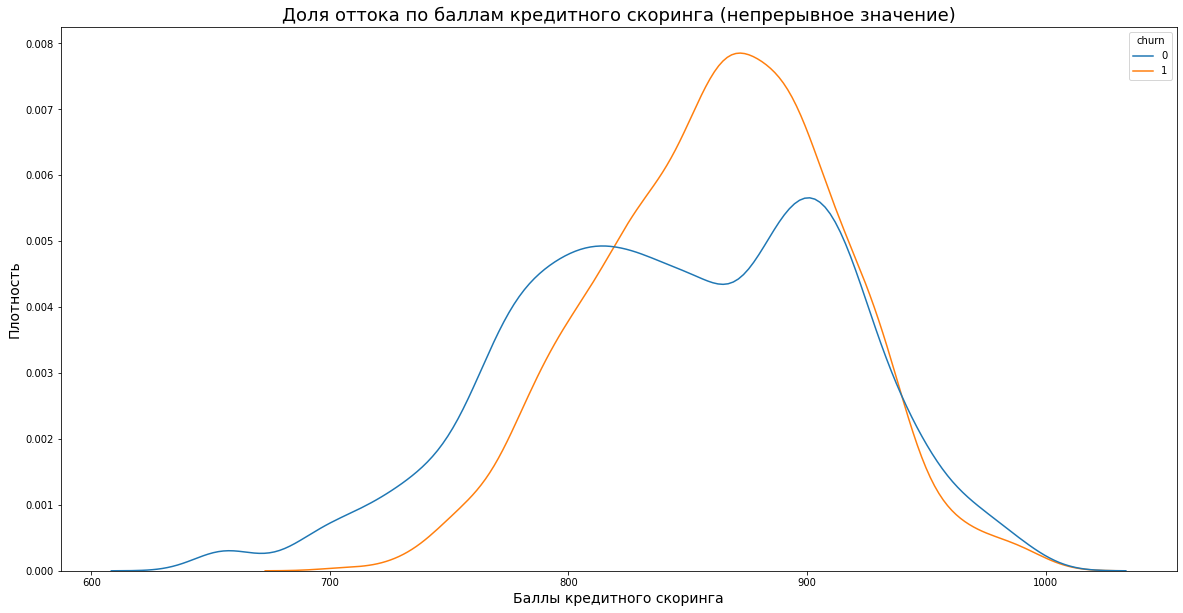

In [32]:
#построение графиков для анализа отточности клиентов
plt.figure(figsize=(20,10))    
sns.kdeplot(data=df, x='score', hue='churn', common_norm=False)
plt.title('Доля оттока по баллам кредитного скоринга (непрерывное значение)',fontsize = 18)
plt.xlabel('Баллы кредитного скоринга',fontsize = 14)
plt.ylabel('Плотность',fontsize = 14)
plt.show()

Пик оттока приходится на 800-900 баллов кредитного скоринга, интересен факт, что когда идет просадка у неотточных клиентов, у отточных наоборот это является пиком.

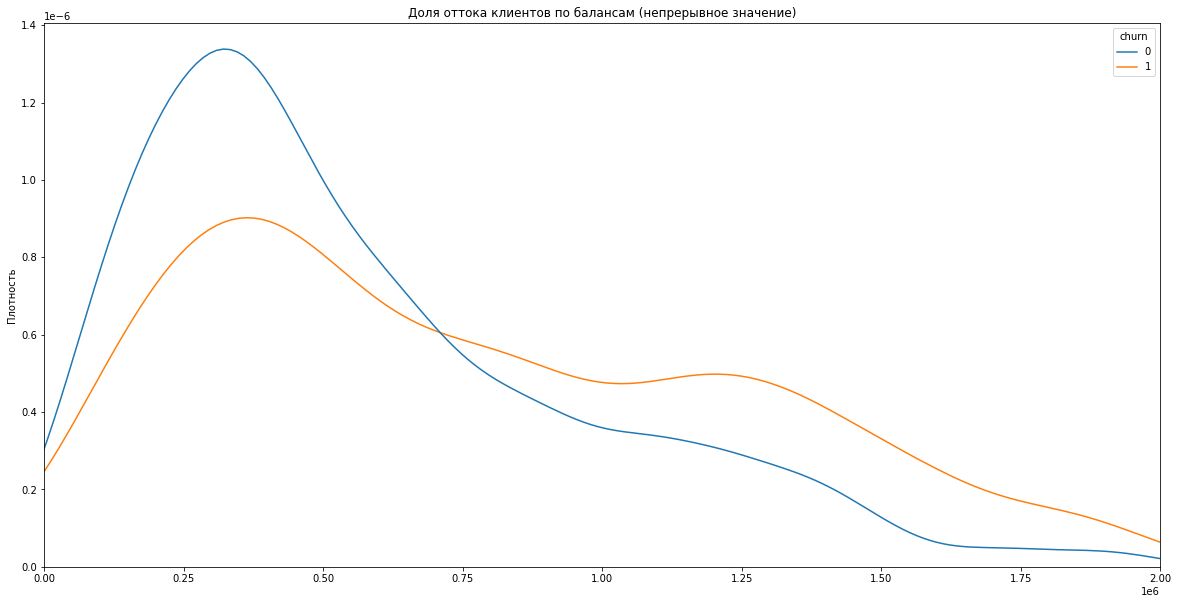

In [33]:
#построение графиков для анализа отточности клиентов
plt.figure(figsize=(20,10))    
sns.kdeplot(data=df[df['balance'] < 2000000], x='balance', hue='churn', common_norm=False)
plt.title('Доля оттока клиентов по балансам (непрерывное значение)')
plt.xlabel('')
plt.ylabel('Плотность')
plt.xlim([0,2000000])
plt.show()

Из граффика видно, что клиенты с балансом более 750 тыс. уходили из банка чаще.

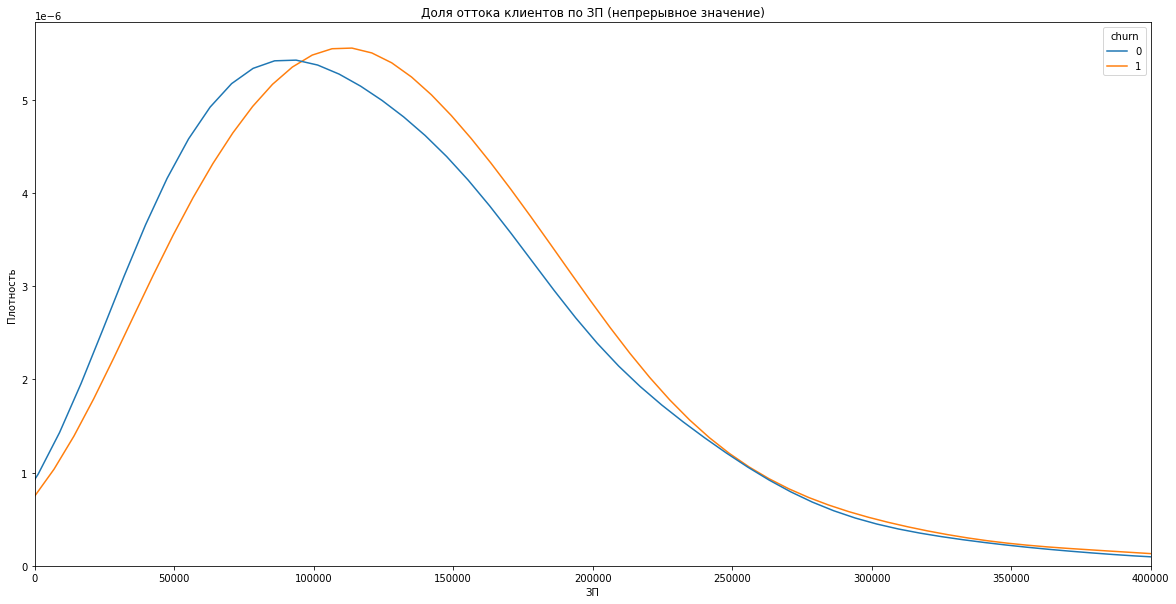

In [34]:
#построение графиков для анализа отточности клиентов
plt.figure(figsize=(20,10))    
sns.kdeplot(data=df, x='est_salary', hue='churn', common_norm=False)
plt.title('Доля оттока клиентов по ЗП (непрерывное значение)')
plt.xlabel('ЗП')
plt.ylabel('Плотность')
plt.xlim([0,400000])
plt.show()

Уровень зарплаты практически не влияет на отточность. 

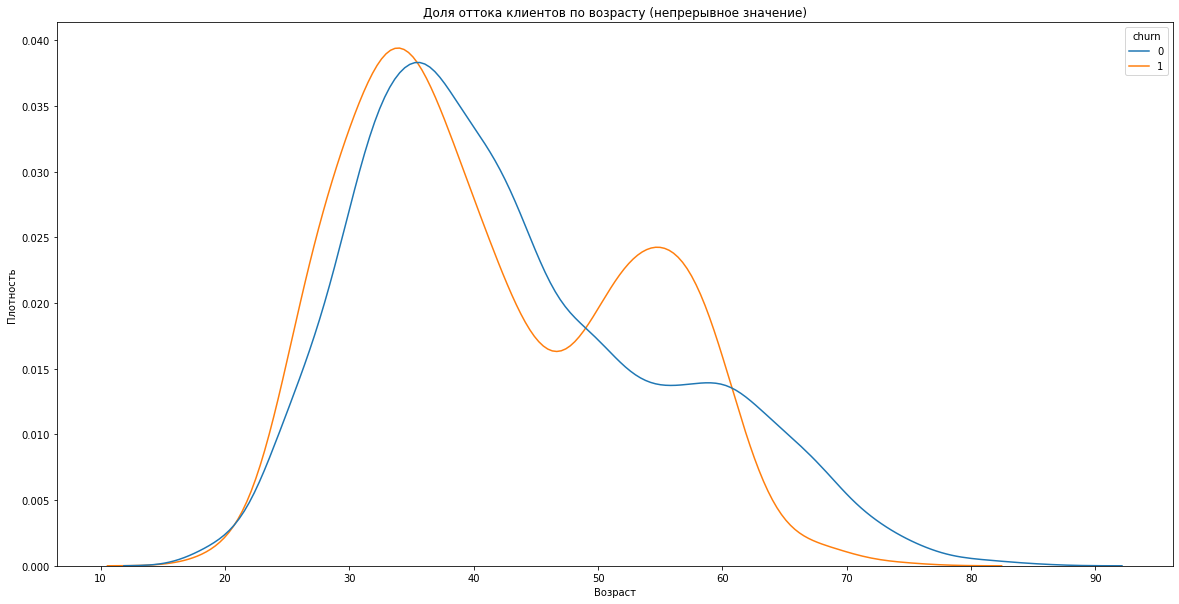

In [35]:
plt.figure(figsize=(20,10))    
sns.kdeplot(data=df, x='age', hue='churn', common_norm=False)
plt.title('Доля оттока клиентов по возрасту (непрерывное значение)')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.show()

<u><b>Анализ корреляции параметров

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'woman', 'man', 'rostov', 'rybinsk', 'yaroslavl']


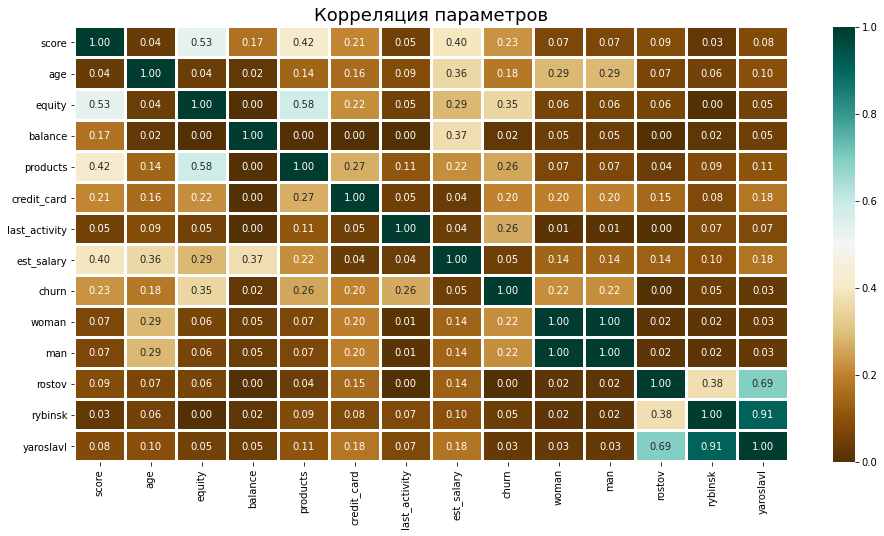

In [36]:
#построение матрицы корреляции через хитмэп
df_corr = df.drop(['user_id','city','gender'], axis=1)
plt.figure(figsize=(16,8))
sns.heatmap (df_corr.phik_matrix(), annot=True, fmt=".2f", cmap= 'BrBG', linewidths=2);
plt.title('Корреляция параметров',fontsize = 18)
plt.show()

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'woman', 'man', 'rostov', 'rybinsk', 'yaroslavl']


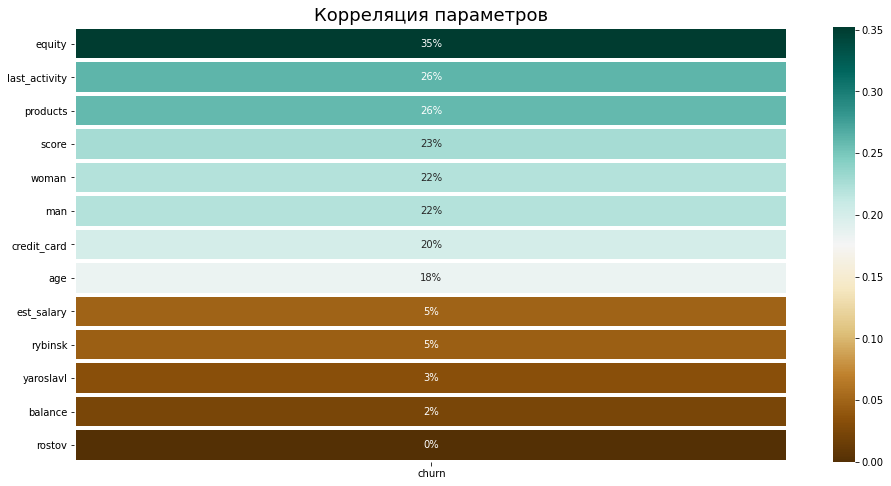

In [37]:
#построение матрицы корреляции через хитмэп к параметру отточности
plt.figure(figsize=(16,8))
sns.heatmap (df_corr.phik_matrix()[['churn']].abs().drop('churn').sort_values('churn', ascending=False), annot=True, fmt=".0%", cmap= 'BrBG', linewidths=3);
plt.title('Корреляция параметров',fontsize = 18)
plt.show()

Слабо коррелируеют с отточности такие параметры как: возраст, наличие кредитной карты, пол (как мужской, так и женский), баллы кредитного скорринга, с количеством продуктов, активность. Среднюю корреляцию можно отметить к приблизительной оценкой собственности.

### 4. Проверка гипотез

<u><b>Гипотеза № 1. Между ушедшими клиентами и клиентами, которые остались нет статистически значимого различия доходов.

За нулевую гипотезу $H_{0}$ примем вариант, что доходы ушедших и оставшихся клиентов не имеют статистически значимого различия.
За альтернативную гипотезу$H_{1}$ примем противоположный вариант, что статистически значимые различия имеются.

Дополнительно проверим как распределяются значения.

In [38]:
#выделим отдельно массивы для отточных и неотточных
df_0 = df.query('churn == 0')
df_1 = df.query('churn == 1')

Проверим две генеральные совакупности, для этого применим метод scipy.stats.ttest_ind. Так как, массивы данных достаточно расношерстные, зададим паметру equal_var значение False.

Уровень статистической значимость зададим раным 0.05. 

In [39]:
#проведем t-тест
alpha = .05

results = st.ttest_ind(df_0['est_salary'],df_1['est_salary'], equal_var=False)

print('p-значение:', results.pvalue.round(3))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.835
Не получилось отвергнуть нулевую гипотезу


Значение p-value показывает: вероятность случайно получить такое или большее различие равна более 85%. Это огромная вероятность, чтобы делать вывод о значимом различии между доходами клиентов. Таким образом гипотеза $H_{0}$ о том, что доходы ушедших и оставшихся клиентов не имеют статистически значимого различия подтвердилась.

Дополнительно проверим гипотезу критерием Манна-Уитни:

In [40]:
#проведем u-тест
results = st.mannwhitneyu(df_0['est_salary'],df_1['est_salary'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.00016830729188229058
Отвергаем нулевую гипотезу: разница статистически значима


По критерию Манна-Уитни p-value выдает значение близкое к нулю, что говорит о наличии статистически значимых отличий. Однако из графиков выше видно, что мы имеем нормальное равномерное распределение, что указывает на необходимость использования критерия Стьюдента.

In [41]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(df['est_salary'])
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Распределение не нормально')
else:
    print('Распределение нормально') 


p-значение:  0.0
Распределение не нормально


При дополнительной проверке данных статистическим тестом на нормальность (критерий Шапиро-Уилка), можно сделать вывод, что распределение не нормально, предпочтительно использовать критерий Манна-Уитни, который менее чувствителен к выбросам. 

Дополнительно посмотрим на выбросы по доходам клиентов, для этого построим диаграмму размаха.

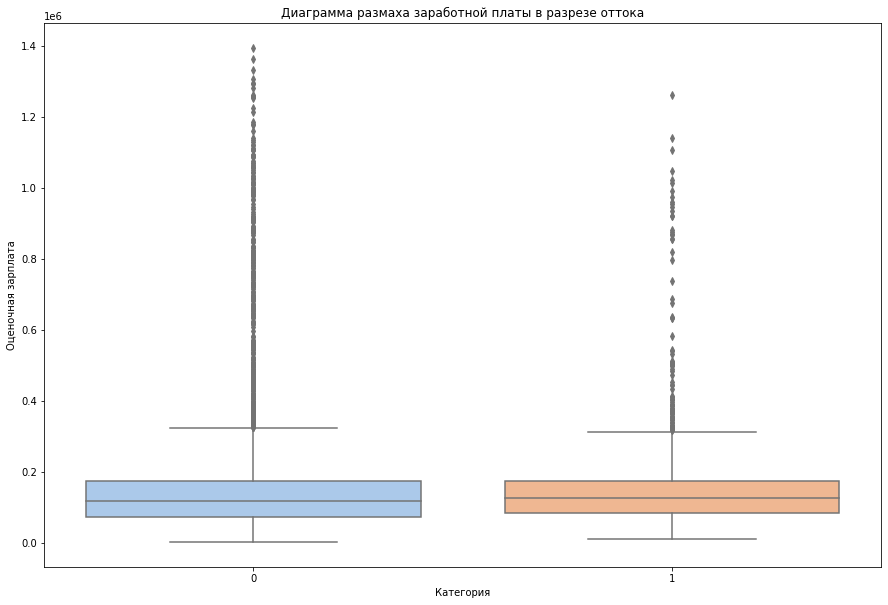

In [42]:
plt.figure(figsize=(15, 10))
sns.set_palette('pastel')
sns.boxplot(data=df, x='churn', y='est_salary')
plt.title("Диаграмма размаха заработной платы в разрезе оттока")
plt.xlabel('Категория')
plt.ylabel('Оценочная зарплата')
plt.show()

Отброзим выбросы, и проведем t-тест еще раз.

In [43]:
df_sal = df.query('est_salary <400000')

df_sal_0 = df_sal.query('churn == 0')
df_sal_1 = df_sal.query('churn == 1')

#проведем t-тест
alpha = .05

results = st.ttest_ind(df_sal_0['est_salary'],df_sal_1['est_salary'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.00015606211182171226
Отвергаем нулевую гипотезу


При проведении t-теста с учетом отброшенных данных видно, что p-value стремиться к нулю и практически имеет такое значение и при проведении u-теста. Таким образом, при проведения исследования лучше использовать критерий Манна-Уитни, который менее чувствителен к выбросам.

<u><b>Гипотеза № 2. Между ушедшими клиенатами и клиентами, которые остались нет статистически значимого различия в оценке собственности клиента.

За нулевую гипотезу $H_{0}$ примем вариант, что оценка собственности капитала ушедших оставшихся клиентов не имеют статистически значимого различия.
За альтернативную гипотезу$H_{1}$ примем противоположный вариант, что такие различия есть.

Посмотри на распределение клиентов по оценке собственности капитала.

In [44]:
#анализ распределения неотточных клиентов
equity_0 = df_0.pivot_table(index='equity', values='user_id', aggfunc='count').reset_index()
equity_0 = equity_0.rename(columns={'user_id':'count'})
equity_0

,equity,count
0,0,2486
1,1,680
2,2,885
3,3,1219
4,4,1383
5,5,1339
6,6,103
7,7,43
8,8,11
9,9,6


In [45]:
#анализ распределения отточных клиентов
equity_1 = df_1.pivot_table(index='equity', values='user_id', aggfunc='count').reset_index()
equity_1 = equity_1.rename(columns={'user_id':'count'})
equity_1

,equity,count
0,0,90
1,1,93
2,2,166
3,3,321
4,4,464
5,5,576
6,6,58
7,7,37
8,8,6
9,9,7


Проверим две генеральные совакупности, для этого применим метод `scipy.stats.ttest_ind`. Так как, массивы данных достаточно расношерстные, зададим паметру equal_var значение False.

Уровень статистической значимость также зададим раным 0.05. 

In [46]:
#проведем t-тест
alpha = .05

results = st.ttest_ind(df_0['equity'],df_1['equity'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.2265321241808214e-196
Отвергаем нулевую гипотезу


Значение p-value стремится к нулю: такие результаты позволяют нам сделать вывод, что гипотиза $H_{1}$ о том, что между ушедшими клиенатами и клиентами, которые остались имеются статистически значимые различия в оценке собственности капитала. Что подтверждается посчитанной ранее кореляцией.

<u><b>Гипотеза № 3. Между ушедшими клиенатами и клиентами, которые остались нет статистически значимого различия в количестве используемых продуктов банка.

За нулевую гипотезу $H_{0}$ примем вариант, что число продуктов банка, которыми пользуются как ушедшие, так и оставшиеся клиенты не имеют статистически значимого различия.
За альтернативную гипотезу$H_{1}$ примем противоположный вариант, что такие различия есть.

Посмотри на распределение клиентов по количеству продуктов.

In [47]:
#анализ распределения отточных клиентов
prod_0 = df_0.pivot_table(index='products', values='user_id', aggfunc='count').reset_index()
prod_0 = prod_0.rename(columns={'user_id':'count'})
prod_0

,products,count
0,1,3088
1,2,4141
2,3,741
3,4,174
4,5,11


In [48]:
#анализ распределения отточных клиентов
prod_1 = df_1.pivot_table(index='products', values='user_id', aggfunc='count').reset_index()
prod_1 = prod_1.rename(columns={'user_id':'count'})
prod_1

,products,count
0,1,235
1,2,978
2,3,297
3,4,300
4,5,8


Видно, что больше всего клиентов используют 2 продукта банка.

Проверим две генеральные совакупности, для этого применим метод scipy.stats.ttest_ind. Так как, массивы данных достаточно расношерстные, зададим паметру equal_var значение False.

Уровень статистической значимость также зададим раным 0.05. 

In [49]:
#проведем t-тест
alpha = .05

results = st.ttest_ind(df_0['products'],df_1['products'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.2671065900765871e-138
Отвергаем нулевую гипотезу


Значение p-value стремится к нулю: такие результаты позволяют нам сделать вывод, что гипотиза $H_{1}$ о том, что между ушедшими клиенатами и клиентами, которые остались имеются статистически значимые различия в количестве используемых продуктов банка. Что также подтверждается посчитанной ранее кореляцией.

### 5. Промежуточный итог анализа

В ходе проведения исследования стало известно:
1) По города доля отточных практически не превышает средний процент оттока по банку - в Рыбинске отточность меньше, в Ярославле и Ростове Великом, чуть выше: на 0,8 и 0,5 п.п. соответственно.<br>
2) Мужчины отказываются от услуг банка чаще, чем женщины - процент оттока выше среднего по банку и составляет 23,7%.<br>
3) Клиенты, у которых нет кредитных карт уходят чаще, процент оттока у таких клиентов равен 25,6%, что также выше среднего процента оттока по банку (18,2%).<br>
4) Клиенты с высокой активностью в последнее время имеют высокий процент оттока - 24,5%.<br>
5) Доля оттока у клиентов с оценкой собственности выше 2 также выше среднего оттока по банку. Важно отметить, что чем выше оценка, тем больше процент оттока, за исключение оценки 8, но такая оценка также имеет высокий процент оттока - 35,3%.<br>
6) Чем больше продуктов у клиента банка, тем выше процент оттока, особенно это заметно, если таких продуктов более двух.<br>
7) После 45 лет и до 60 доля оттока достаточно высока, также стоит обратить внимание на отток в 34 года - он самый большой по параметру возраста.<br>
8) Наиболее отточная доля у клиентов чей кредитный рейтинг находится в диапазоне от 800 до 950.<br>
9) Клиенты с высоким уровне баланса (от 750 000) также склонны к уходу из банка.

Далее проведем сегментацию, основными параметрами выберем количество продуктов, пол, оценку собственности капитала и активность клиентов.

### 6. Сегментация на основе стратегических показателей 

<u><b>Сегмент № 1

<b>Пол:</b> мужской <br>
<b>Баланс:</b> более 750000

In [50]:
#подготовим выборку по параметрам сегмента
segm_1 = df.query('man == 1 and balance > 750000').agg({'churn': ['mean','sum','count']}).round(2)
segm_1

,churn
mean,0.45
sum,619.00
count,1370.00


В сегменте №1 были выбраны мужчины с балансом более 750000. Видно, что уровень отточности данного сегмента 45%, всего в сегменте 1370 клиента, 619 из которых являются отточными.

<u><b>Сегмент № 2

<b>Возраст:</b> 30 - 60 лет <br>
<b>Количество продуктов банка:</b> более 2

In [51]:
#подготовим выборку по параметрам сегмента
segm_2 = df.query('age > 29 and age < 61 and products > 2').agg({'churn': ['mean','sum','count']}).round(2)
segm_2

,churn
mean,0.43
sum,514.00
count,1189.00


В сегменте №2 были выбраны клиенты от 30 до 60 лет  с числом используемых продуктов больше 2. Уровень отточности данного сегмента 43%, всего в сегменте 1189 клиента, 514 из которых являются отточными.

<u><b>Сегмент № 3

<b>Возраст:</b> 50 - 60 лет <br>
<b>Оценка собственности клиента:</b> более 4

In [52]:
#подготовим выборку по параметрам сегмента
segm_3 = df.query('age > 49 and age < 61 and equity > 4').agg({'churn': ['mean','sum','count']}).round(2)
segm_3

,churn
mean,0.4
sum,166.0
count,418.0


In [53]:
### код для проверки успешности проведения сегментации

qrys = ('age > 29 and age < 61 and products > 2',
        'man == 1 and balance > 750000',
        'age > 49 and age < 61 and equity > 4')
    
    
df_results = pd.concat([
    pd.DataFrame(df.query(q).agg({"churn":['mean','count']}).values,
                 columns=[q],
                 index=['Отток','Размер']).T 
    for q in qrys])

display(df_results.style.format("{:.1%}",subset=["Отток"])\
                   .format("{:_.0f}",subset=["Размер"]))
    
all_catched = pd.concat([df.query(q) for q in qrys])
all_churn = df.churn.sum()
catched = all_catched.drop_duplicates().churn.sum()
share_catched = catched / all_churn

if len(qrys) != 3:
    print('Результаты некорректны, нужно 3 лучших сегмента')
    
if df_results['Отток'].min() < df.churn.mean() * 1.5:
    print('Нужно изменить сегменты: присутствуют недостаточно отточные')
elif df_results['Отток'].min() < df.churn.mean() * 2:
    print('Часть сегментов не высокоотточна')
elif df_results['Отток'].max() > df.churn.mean() * 3:
    print('Нашли очень отточный сегмент')

if df_results['Размер'].min() < 300:
    print('Нужно изменить сегменты: присутствуют слишком мелкие сегменты')
    
if all_catched.shape[0] > 5000:
    print("Отдел маркетинга не сможет обработать такое количество клиентов")
elif all_catched.shape[0] > 3000:
    print("Отделу маркетинга будет сложно обработать такое количество клиентов, его эффективность снизится")
elif all_catched.shape[0] < 1000:
    print("Сегменты можно увеличить")

text_churn = f"{catched}/{all_churn} = {share_catched:.1%}"
if share_catched < 1/3:
    print(f"В сегменты попало недостаточное число отточных: {text_churn}")
elif share_catched < 1/2:
    print(f"В сегменты попало: {text_churn}")
elif share_catched < 2/3:
    print(f"Хороший результат, в сегменты попало: {text_churn}")
else:
    print(f"Прекрасный результат, в сегменты попало: {text_churn}")

,Отток,Размер
age > 29 and age < 61 and products > 2,43.2%,1_189
man == 1 and balance > 750000,45.2%,1_370
age > 49 and age < 61 and equity > 4,39.7%,418


Хороший результат, в сегменты попало: 968/1818 = 53.2%


### 7. Рекомендации для отдела маркетинга

<b>1) Клиенты с высоким уровнем баланса на счете:</b><br>
Особое внимание необходимо уделить клиентам с большим уровнем денег на счету. Начиная с 750 000 число отточных клиентов превышает неотточных. Возможно стоит рассмотреть программу привилегий для таких клиентов для удержания.<br>

<b>2) Количество продуктов банка:</b> <br>
Больше всего клиентов используют 2 продукта банка. Однако чем больше продуктов банка, тем больше доля отточных, при этом клиенты без кредитных карт уходят чаще. Возможно стоит предлагать чаще кредитные карты, т.к. отточных клиентов с таким продуктом меньше. Также важно пересмотреть продукты банка и сделать их более качественными и интересными для клиента.<br>

<b>3) Оценка собственности капитала:</b><br>
Чем больше оценка собственности клиента, тем уровень оттока выше. Возможно данный параметр имеет связь с балансом. Можно разработать систему страхования такой собственности клиента.<br>

<b>4) Возраст клиента:</b><br>
Начиная с 45 лет клиенты чаще отказываются от услуг банка - самой очевидным предложение здесь является программа раннего накопления пенсии.<br>

<b>5) Программы для мужчин:</b><br>
Мужчины более склонны к уходу, чем женщины - можно предложить программу лояльности для автозаправочных станций, заключить договор со спорт клубом и предложить мужчинам поучаствовать в них (например повышенный кашбэк при заправке или покупки билета на спортивное мероприятие).

### 8. Общий вывод по проекту

<b><i>1) В части ознакомления данных</i></b><br><br>
Датасет содержит информацию о 10000 клиентах банка, явных и неявных дубликатов обнаружено не было. 

<b><i>2) В части предобработки данных</i></b><br>
- Были найдены пропуски по столбцу <u><i>age</i></u> (были удалены, т.к. таких пропусков менее 1%) и по столбцу <u><i>balance</i></u> - установить какую-либо взаимосвязь пропусков не удалось, количество пропусков среди мужчин и женщин примерно одинаково, по городам пропуски распределены пропорционально численности населения города. При дополнительном анализе зависимости пропусков от данных, пропуски практически не влияют на дальнейший анализ. Таким образом, установить взаимосвязь пропусков от имеющихся данных в болшинстве случаев не представляется возможным, но можно заметить, что большая разница имеется при оценке собственности клиента и оценочной зарплаты. Было принято решение оставить такие пропуски.<br>
- Было проведено кодирование данных в бинарные значения для применения среднего и просмотра корреляции.<br>
- Формат столбца AGE был переведен в целочисленный.
- Были убраны аномалии по продуктам (нулевые значения).
- Наименование столбцов переведено в «змеиный» формат.

<b><i>3) В части исследовательского анализа данных</i></b><br>
- Больше всего клиентов находятся в Ярославле (почти 60%), мужчин и женщин среди клиентов одинаково, кредитные карты имеют почти в 2 раза больше клиентов, активных и неактивных клиентов поровну, желание покинуть банк небольшое – 18,2%.
- Основной поток клиентов в возрасте от 25 до 60 лет, большинство клиентов не имеют нулевую оценку собственности (около 2,5 тыс.), около 2 тыс. имеют оценку 4 и 5. У большинства клиентов 2 продукта банка.
- В части отточности клиентов больше всего отточность в Ярославле, мужчины отказываются от услуг банка чаще женщин. Наличие кредитной карты никак на отточность не влияет, в то время как активность клиента является важным параметром. Большой процент клиентов уходит с двумя продуктами банка. Также наблюдается зависимость числа уходов от количества объектов у клиента - чем объектов больше, тем больший процент уходит. Среди возраста больше всего клиентов уходят диапазоне 31-37 лет.
- был проведен анализ корреляции Спирмена. При такой проверке параметров стоит выделить: возраст, наличие кредитной карты, пол (как мужской, так и женский), баллы кредитного скорринга, с количеством продуктов, активность. Среднюю корреляцию можно отметить к приблизительной оценкой собственности.

<b><i>4) В части проверки гипотез</i></b><br><br>
В ходе исследования было проверено 3 гипотезы:
- Между ушедшими клиентами и клиентами, которые остались, нет статистически значимого различия доходов – гипотеза не подтвердилась, статистически значимое различие доходов имеется. Данная гипотеза была проверена при помощи u-теста, т.к. в данный тест менее подвержен выбросам. Было дополнительно проверено гипотеза о нормальности распределении данных при помощи критерия Шапиро.
- Между ушедшими клиентами и клиентами, которые остались, нет статистически значимого различия в оценке собственности клиента. – гипотеза не подтвердилась p-value стремиться к нулю, имеются статистически значимые различия в оценке собственности клиента.
- Между ушедшими клиентами и клиентами, которые остались, нет статистически значимого различия в количестве используемых продуктов банка – гипотеза не подтвердилась p-value стремиться к нулю, имеются статистически значимые различия в оценке собственности клиента.

<b><i>5) В части сегментации на основе стратегических показателей</i></b><br><br>
Было определено 3 сегмента:
- В сегменте №1 были выбраны мужчины с балансом более 750000. Видно, что уровень отточности данного сегмента 45%, всего в сегменте 1370 клиента, 619 из которых являются отточными.
- В сегменте №2 были выбраны клиенты от 30 до 60 лет с числом используемых продуктов больше 2. Уровень отточности данного сегмента 43%, всего в сегменте 1189 клиента, 514 из которых являются отточными.
- В сегменте №3 были выбраны клиенты от 50 до 60 лет с оценкой собственности клиента более 4. Уровень отточности данного сегмента 40%, всего в сегменте 418 клиента, 166 из которых являются отточными.

На основе выделенных сегментов были подготовлены рекомендации для отдела маркетинга.

### 9. Подготовка презентации

1) <a href='https://disk.yandex.ru/i/0cPJfk7Hwp9sKg'> Презентация </a><br>
2) <a href='https://public.tableau.com/app/profile/anton8215/viz/Dashbord_metabank_SAN/Churn_bankSAN?publish=yes'>Дэшборд</a>